# Salary - Years worked prediction

In this project, we use a simple linear regression to predict the relation between Years worked and salary. To predict the objetive variable a model from sklearn library is used. In this case an CSV file is imported to analyze the information and find the independent and dependent variables.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In first instance, data should be read from a CSV file:

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Verify that the dataset does not have null values

In [3]:
data.any().isna()

Age                    False
Gender                 False
Education Level        False
Job Title              False
Years of Experience    False
Salary                 False
dtype: bool

The dataset doesn't have null values. In this dataset, the only value it can be predict is the salary in order to years experience. Plotting this variables:

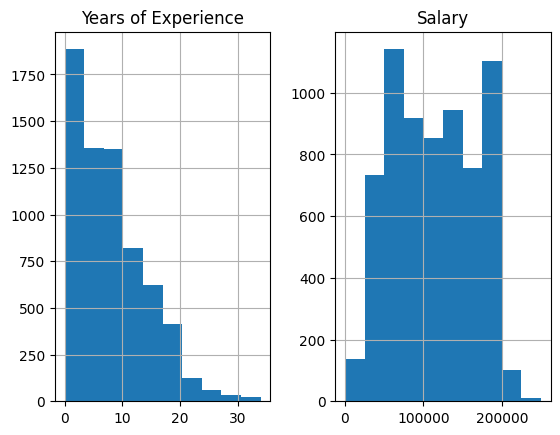

In [6]:
cdf = data[['Years of Experience','Salary']].dropna()
cdf.hist()
plt.show()

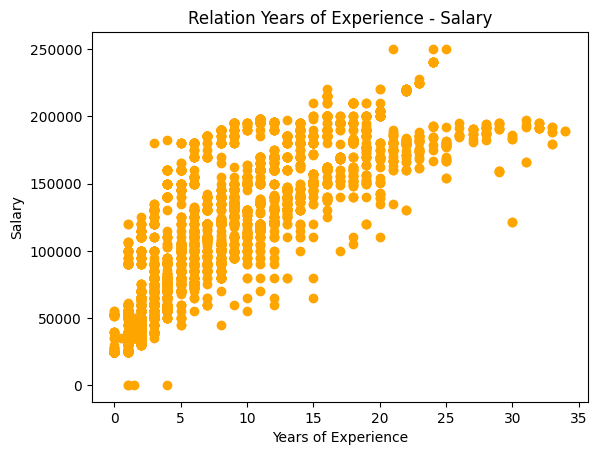

In [7]:
plt.scatter(x = cdf['Years of Experience'],y = cdf.Salary, color = 'orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Relation Years of Experience - Salary')
plt.show()

In this case we can observe in this variables that the relation is a linear case. Separating the train variables and test variables:

In [8]:
mask = np.random.rand(len(cdf)) < 0.8 #80 percent of the data
train = cdf[mask]
test = cdf[~mask]

Distribution of the train model:

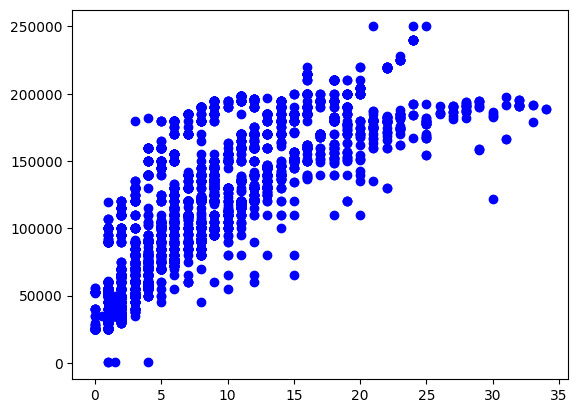

In [9]:
plt.scatter(x = train['Years of Experience'],y = train.Salary,color = 'blue')

Creating an instance of linear regression and training the model:

In [10]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Years of Experience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7037.65829346]]
Intercept:  [58513.02524769]


Then we have to use the test data for predict any value:

In [11]:
x_test = np.asanyarray(test[['Years of Experience']])
y_hat = regr.predict(x_test)
y_hat

array([[199266.1911169 ],
       [128889.6081823 ],
       [ 79626.00012807],
       ...,
       [ 86663.65842153],
       [199266.1911169 ],
       [ 86663.65842153]])

The model is trained and we can predict any value:

In [12]:
response = float(input("Years of experience: "))
print(f"The salary of a person who has {response} years of experience is: ",regr.predict([[response]])[0][0])


Years of experience: 16.5
The salary of a person who has 16.5 years of experience is:  174634.38708979107
